In [1]:
# Imports

import csv
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [53]:
# Get data from a csv file
def readcsv(filename):
    matrix = []
    
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            matrix += [row]
    return np.array(matrix).astype(float)

In [3]:
# Get data by generating it
# Make two clusters for now
def makedata():
    matrix = []
    for i in range(2):
        numpoints = random.randint(5,20)
        offsetx = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        offsety = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        constant = random.uniform(0, 20) * (math.pow(-1, random.randint(0,2)))
        for j in range(numpoints):
            x = random.random() + offsetx
            y = random.random() + offsety
            c = random.random() + constant
            multiplier = random.uniform(0,10)
            row = list(map(lambda x: x * multiplier, [x, y, c]))
            matrix += [row]
    return np.array(matrix)

In [4]:
# TODO - generalize for number of independent random variables
def makedataNum(numclusters):
    matrix = []
    for i in range(numclusters):
        numpoints = random.randint(5,20)
        offsetx = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        offsety = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        constant = random.uniform(0, 20) * (math.pow(-1, random.randint(0,2)))
        for j in range(numpoints):
            x = random.random() + offsetx
            y = random.random() + offsety
            c = random.random() + constant
            multiplier = random.uniform(0,10)
            row = list(map(lambda x: x * multiplier, [x, y, c]))
            matrix += [row]
    return np.array(matrix)

In [5]:
# Normalize each row of the matrix
def normalize(matrix):
    normMatrix = []
    for i in range(len(matrix)):
        vector = np.array(matrix[i][:(len(matrix[i]) - 1)])
        norm = np.linalg.norm(vector)        
        normVector = matrix[i] / norm
        normMatrix += [normVector]
    return np.array(normMatrix)


In [6]:
# Plot sum of squared errors for k means clustering
# for each k <= maxclusters
# Elbow of graph = optimal number of clusters
def bestkcluster(matrix, maxclusters):
    sse = [] # sum of squared distances for each k
    for k in range(1, maxclusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(matrix)
        centers = kmeans.cluster_centers_
        sse += [sum(np.min(cdist(matrix, centers, 'euclidean'), axis=1)) / matrix.shape[0]]
    plt.plot(list(range(1,maxclusters+1)), sse)
    plt.show()
    
# Find the clusters for k means clustering for a
# given k. Use bestkcluster to find optimal k
def kcluster(matrix, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(matrix)
    return kmeans.cluster_centers_

In [26]:
# Find the lines for the overdetermined system using LSM
# Input: matrix with rows of the form ax + by = c
# Output: square matrix
def LSM(matrix):
    # Reformat matrix to be Y = Ax for x[0] = c
    A = []
    for row in matrix:
        newrow = [row[2] / row[1], -1 * row[0] / row[1]]
        A += [newrow]
    
    # Compute (A.T A) X =  Y. Let B = (A.T A)
    B = np.dot(np.transpose(A), A)
    
    # Translate to lines ax + by = c into a matrix
    final = []
    for r in B:
        final += [[-1 * r[1], 1, r[0]]]
    return final
    

In [32]:
# When system is not overdetermined,
# try to find solution
def solution(matrix):
    if len(matrix) != len(matrix[0]) - 1:
        print("Overdetermined system")
    coefficients = [matrix[0][:len(matrix[0])-1], matrix[1][:len(matrix[1])-1]]
    consts = [matrix[0][len(matrix[0])-1], matrix[1][len(matrix[1])-1]]
    return np.linalg.solve(coefficients, consts)

In [9]:
# Input: normalized matrix (see normalize function)
# Relies on fact that 2D vectors
def graphVectors(nmatrix):
    X = []
    Y = []
    for i in range(len(nmatrix)):
        X += [nmatrix[i][0]]
        Y += [nmatrix[i][1]]
    
    origin = [0], [0]
    plt.figure()
    ax = plt.gca()
    ax.quiver(*origin, X, Y, angles='xy', scale_units='xy', scale = 1)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.plot(0,0, 'ro')
    plt.draw()
    plt.show()

In [45]:
# Graph output of k-means clustering
def graphlines(equations):
    x = np.linspace(-10, 10, 1000)
    plt.figure()
    for c in equations:
        plt.plot(x, (c[2] - (x * c[0])) / c[1])
    plt.show()

Data found:
[[ 1.     1.     1.   ]
 [ 2.     2.     1.9  ]
 [ 1.    -1.     1.   ]
 [ 1.    -0.99   1.1  ]
 [ 0.5   -0.495  0.5  ]]


Lines


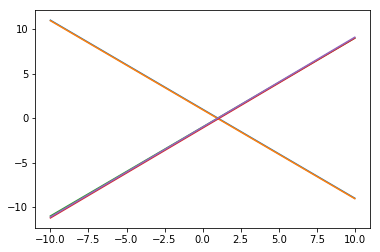



Normal Vectors:


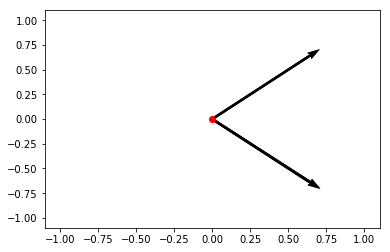

Sum of Squared Errors for each k


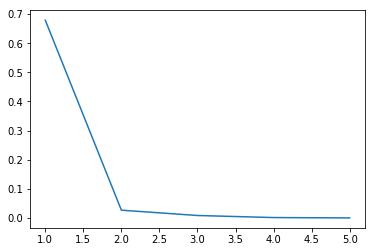

Clusters found with k = 2:
0.7094696664023207x + -0.7047319923422526y = 0.733158036702661
0.7071067811865475x + 0.7071067811865475y = 0.6894291116568838


Graph of lines from clusters:


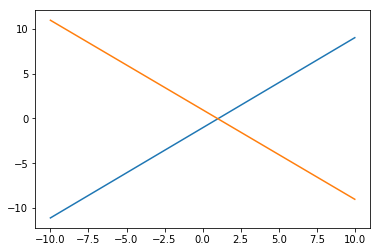

Solution:
[ 1.00429222 -0.02929222]


LSM Solution
5.09263850627487x + 1y = 5.1573719518416485
-5.040608101214161x + 1y = -5.09263850627487
Graph of lines from matrix:


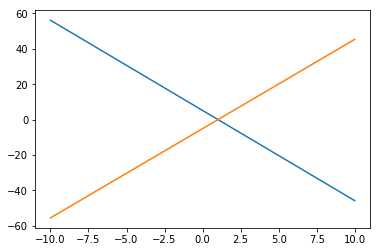

Solution:
[1.01152285 0.00605175]


In [55]:
# RUN SCRIPT
if __name__ == "__main__":
    numclusters = 2 # change number of clusters
    data = makedataNum(numclusters) # Alternatively, readcsv("smalltestdata.csv")
    print("Data found:")
    print(data)
    print("\n")
    data = normalize(data)
    print("Lines")
    graphlines(data)
    print("\n")
    
    print("Normal Vectors:")
    graphVectors(data)
    
    print("Sum of Squared Errors for each k")
    bestkcluster(data, 10)
    
    cluster = kcluster(data, numclusters)
    print("Clusters found with k = " + str(numclusters) + ":")
    for c in cluster:
        print(str(c[0]) + "x + " + str(c[1]) +"y = " + str(c[2]))
    print("\n")
    
    print("Graph of lines from clusters:")
    graphlines(cluster)
    print("Solution:")
    print(solution(cluster))
    
    print("\n")
    print("LSM Solution")
    sqmatrix = LSM(data)
    for e in sqmatrix:
        print(str(e[0]) + "x + " + str(e[1]) + "y = " + str(e[2]))
        
    print("Graph of lines from matrix:")
    graphlines(sqmatrix)
    print("Solution:")
    print(solution(sqmatrix))